# 太陽能資訊

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
base_path = './02_data/'

In [4]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-01.json')
with open(ffn, 'r') as f:
    data = json.load(f)
    

In [5]:
data = data['data']

### 畫出整廠的發電

- 原來使用matplotlib

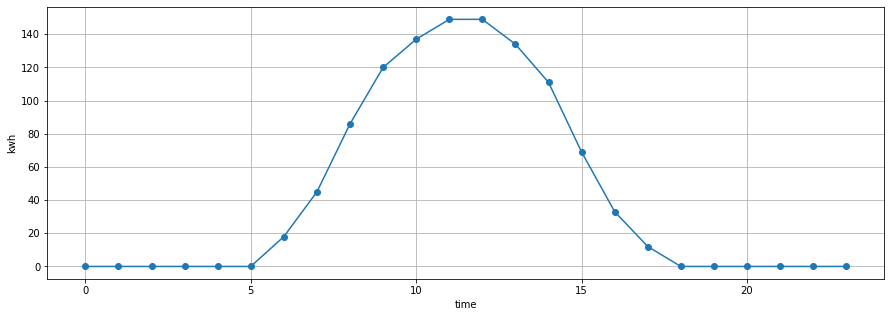

In [15]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

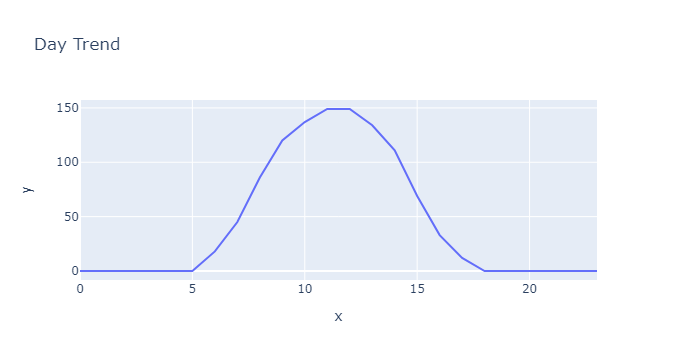

In [9]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = data['hour'],
    y = data['total_e']
))
fig = px.line(df, x="x", y="y", title="Day Trend") 
fig.show()


- X, Y軸加入好的命名方式

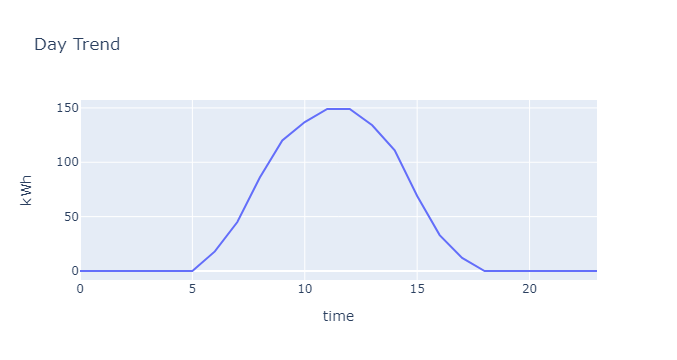

In [10]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    kWh = data['total_e']
))
fig = px.line(df, x="time", y="kWh", title="Day Trend") 
fig.show()


- 加入 Marker

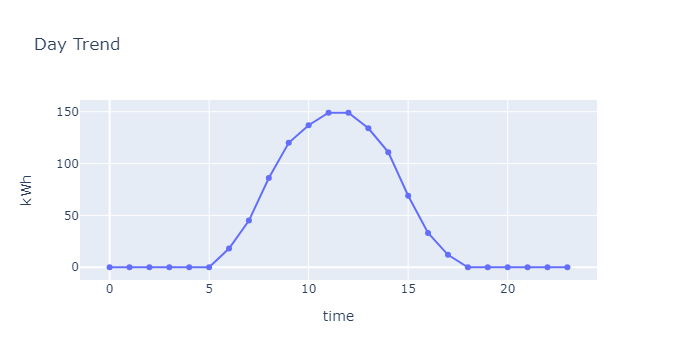

In [11]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    kWh = data['total_e']
))
fig = px.line(df, x="time", y="kWh", title="Day Trend", markers=True)
fig.show()


### 這樣並不容易評估發電是否夠好
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

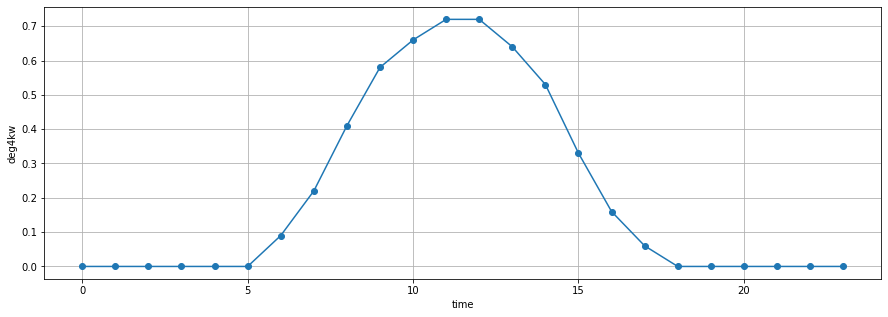

In [17]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

- 用plotly

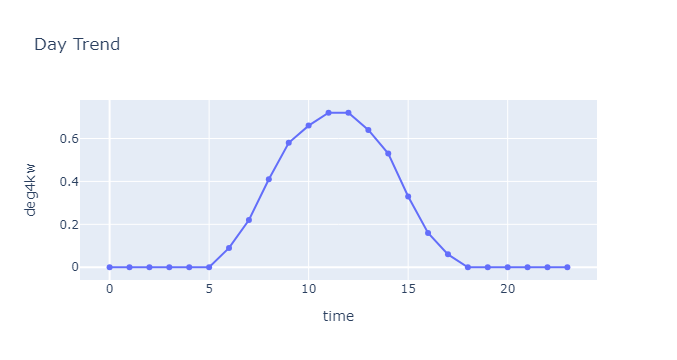

In [12]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw']
))
fig = px.line(df, x="time", y="deg4kw", title="Day Trend", markers=True)
fig.show()


### 把日照的資訊加進來

In [14]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

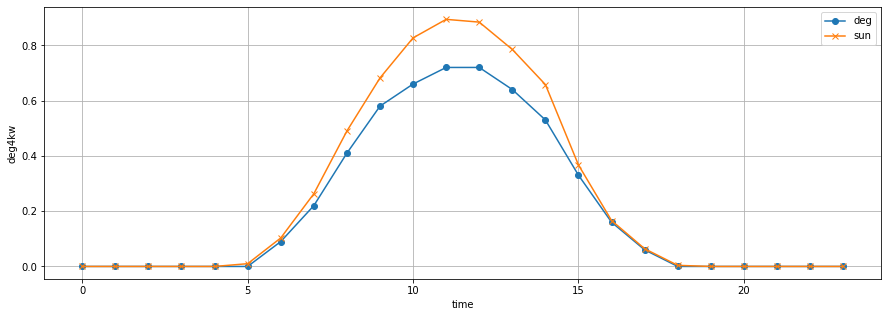

In [15]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o', label='deg')
plt.plot(data['hour'], data['sun'], '-x', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.legend()
plt.show()

- 使用plotly

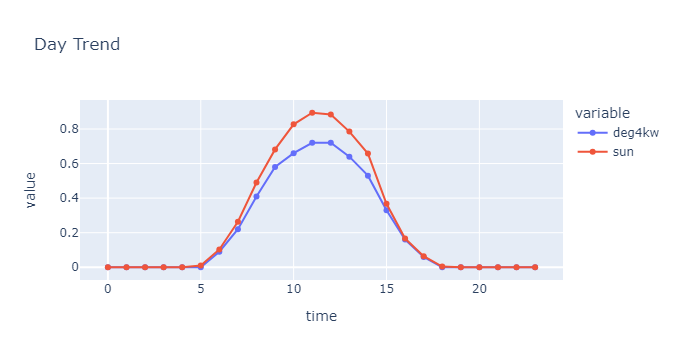

In [19]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw'],
    sun = data['sun']
))
fig = px.line(df, x="time", y=["deg4kw", 'sun'], title="Day Trend", markers=True)
fig.show()


- 一次畫二張圖，Y轉的Title就跑掉了

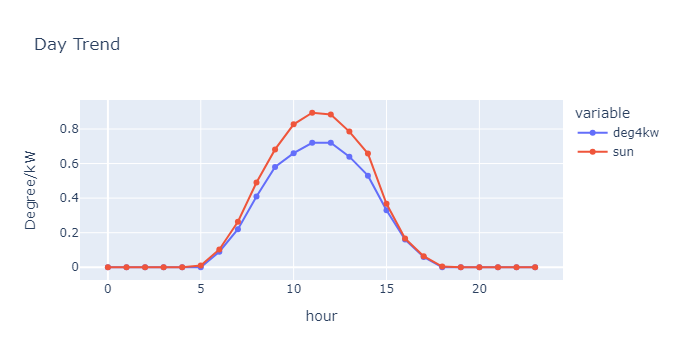

In [22]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['hour'],
    deg4kw = data['deg4kw'],
    sun = data['sun']
))
fig = px.line(df, x="time", y=["deg4kw", 'sun'], title="Day Trend", markers=True)
fig.update_layout(
    xaxis_title="hour", yaxis_title="Degree/kW"
)

fig.show()



In [ ]:
D